# 라이브러리

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
import numpy as np
import seaborn as sns
warnings.filterwarnings('ignore')


# 서울시 행복지수 소계 추세

In [2]:
dt = pd.read_csv('./data/seoul.csv',index_col=0)
# dt

In [3]:
seoul_year = pd.DataFrame()
years = ['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021'] 


for y in years:
    df = dt.melt(id_vars='구분',value_vars=y,var_name='년도',value_name='소계')
    seoul_year = pd.concat([seoul_year,df],axis=0)

seoul_year.sort_values(['구분','년도'],inplace=True)
seoul_year.reset_index(drop=True, inplace=True)
seoul_year['소계'] = seoul_year['소계'].astype(float)

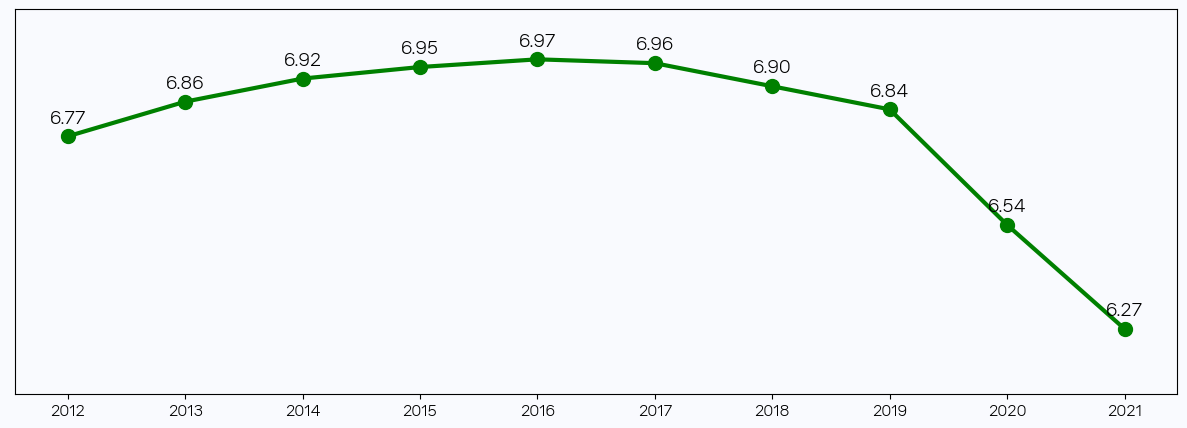

In [5]:
plt.figure(figsize=(15,5))
mpl.rc('axes', facecolor = '#F9FAFE', edgecolor = 'k')
mpl.rc('figure', facecolor = '#F9FAFE', edgecolor ='#F9FAFE')

plt.plot(seoul_year['년도'], seoul_year['소계'],'go-',markersize=10,linewidth=3)
plt.gca().axes.yaxis.set_visible(False)

# plt.title('서울시 행복지수 변화추세(2012~2021)')


x = seoul_year['년도']
y = seoul_year['소계']

for i in range(len(x)):
    height = y[i]
    plt.text(x[i],height + 0.03, '%.2f' %height, ha='center',va='bottom',size=12)
plt.ylim(6.1,7.1)
# plt.savefig('./png/서울시행복지수_제목없이.png')
plt.show()


# 행복지수 항목별 파이차트

In [33]:
dt = pd.read_csv('./data/seoul.csv',index_col=0)
dt

,구분,2003,2003건강,2003재정,2003관계,2003가정,2003사회,2004,2004건강,2004재정,...,2020재정,2020관계,2020가정,2020사회,2021,2021건강,2021재정,2021관계,2021가정,2021사회
0,소계,6.28,6.29,4.95,6.72,7,6.43,6.42,6.56,5.07,...,5.99,6.64,6.67,6.43,6.27,6.63,5.7,6.38,6.45,6.2


In [46]:
dt.iloc[:,1:] = dt.iloc[:,1:].astype(float)

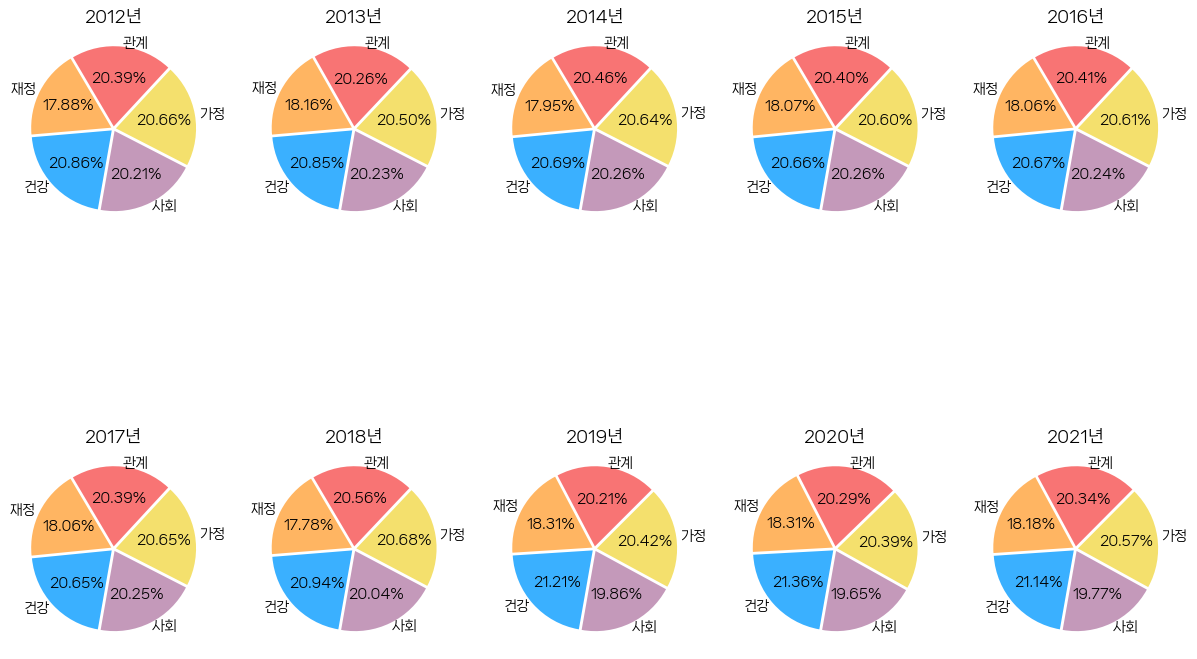

In [37]:
year = ['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
labels= ['건강','재정','관계','가정','사회']
explode=[0.03,0.03,0.03,0.03,0.03]
colors = ['#3AB0FF', '#FFB562', '#F87474', '#F4E06D','#C499BA']
wedgeprops={'width': 0.9, 'edgecolor': 'w', 'linewidth': 5}

plt.figure(figsize=(15,10))
for i,y in enumerate(year):
    pie = pd.DataFrame(dt.loc[0,f'{y}':f'{y}사회'])
    pie.rename(columns={0:'idx'},inplace=True)
    pie.drop(index=y,inplace=True)
    all = pie['idx'].sum()
    pie['rate'] = pie['idx']/all*100
    
    i += 1
    plt.subplot(2,5,i)
    plt.pie(pie['rate'],
            labels=labels, 
            autopct='%.2f%%',
            startangle=260,
            labeldistance=1.05, 
            counterclock=False,
            explode=explode,
            colors=colors)
    plt.title(f'{y}년')
plt.show()

# 행복지수 항목별 바차트

In [82]:
year = ['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
labels= ['건강','재정','관계','가정','사회']
index = np.arange(len(labels))
colors = ['#3AB0FF', '#FFB562', '#F87474', '#F4E06D','#C499BA']

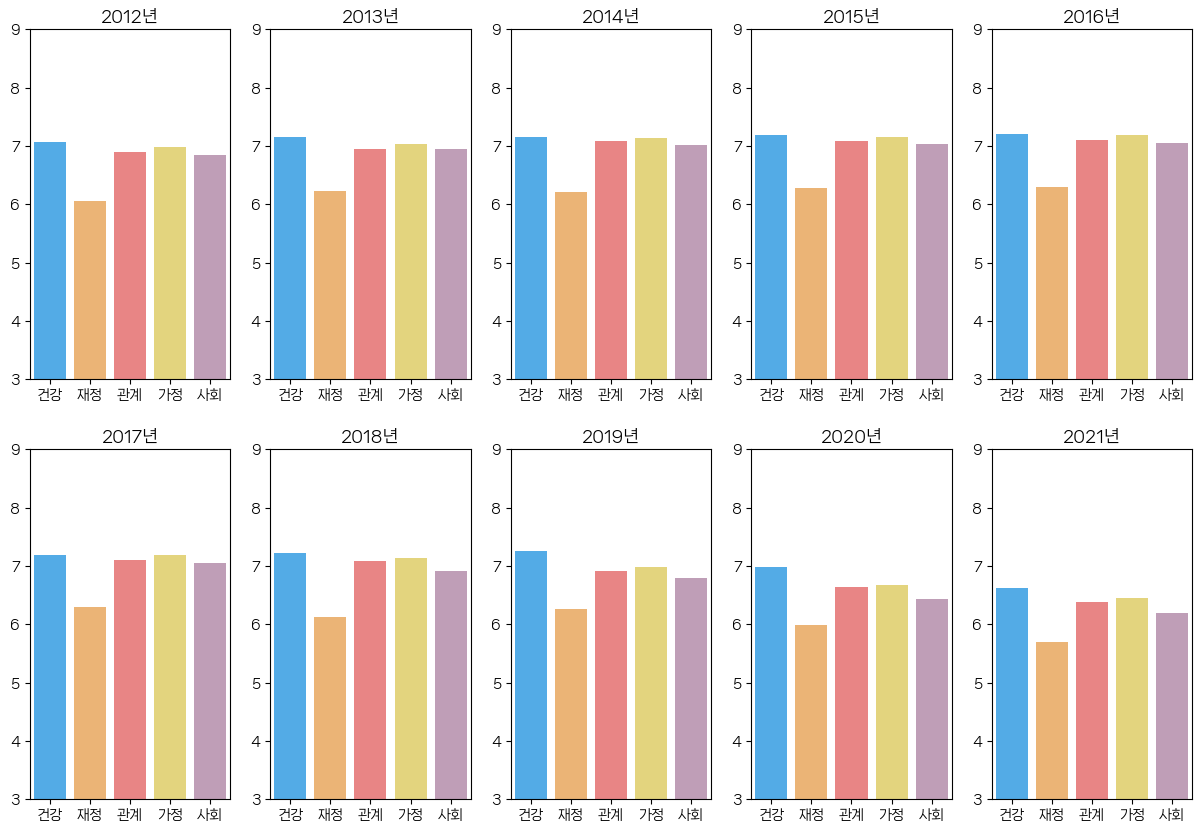

In [83]:
plt.figure(figsize=(15,10))
for i,y in enumerate(year):
    pie = pd.DataFrame(dt.loc[0,f'{y}':f'{y}사회'])
    pie.rename(columns={0:'idx'},inplace=True)
    pie.drop(index=y,inplace=True)
    # print(pie.iloc[:,:])
    
    i += 1
    plt.subplot(2,5,i)
    sns.barplot(data=pie,x=labels,y=pie['idx'],palette=colors)
    plt.title(f'{y}년')
    plt.ylim(3,9)
    plt.ylabel('')
    plt.xticks(index, labels)
plt.show()

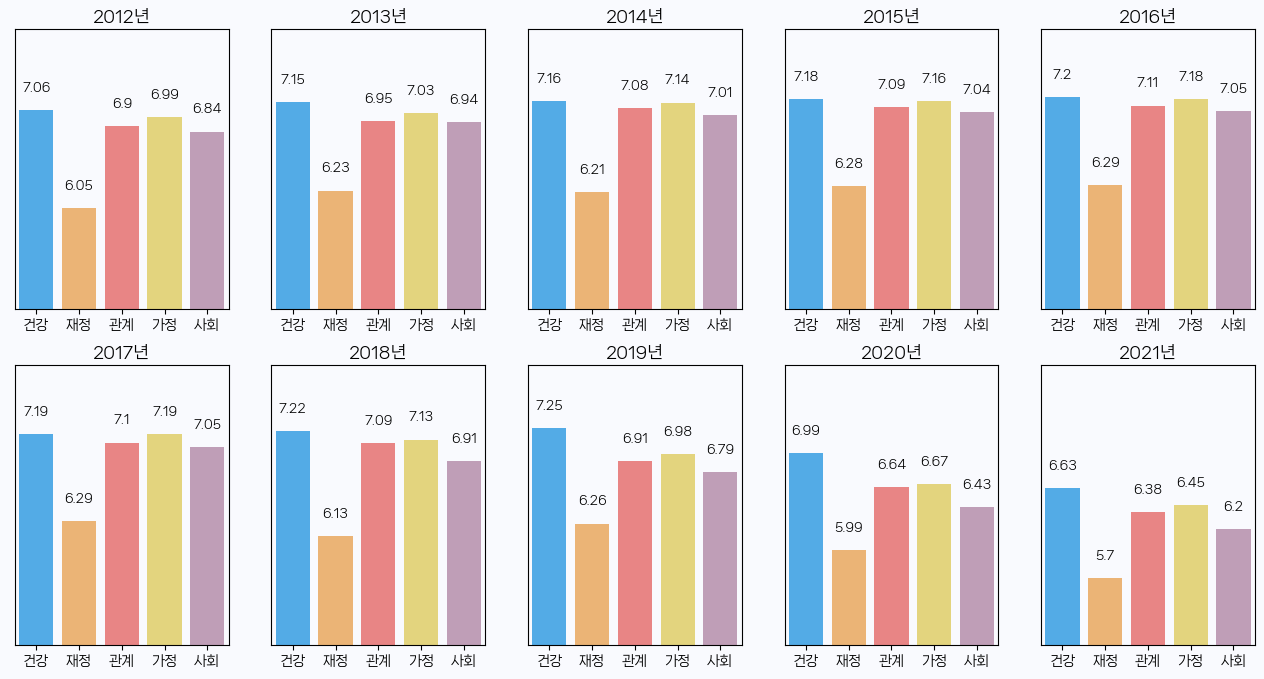

In [111]:
plt.figure(figsize=(16,8))
#그래프 내부 배경 색

mpl.rc('axes', facecolor = '#F9FAFE', edgecolor = 'k')

#그래프 외부 배경 색

mpl.rc('figure', facecolor = '#F9FAFE', edgecolor ='#F9FAFE')
for i,y in enumerate(year):
    pie = pd.DataFrame(dt.loc[0,f'{y}':f'{y}사회'])
    pie.rename(columns={0:'idx'},inplace=True)
    pie.drop(index=y,inplace=True)
    # print(pie.iloc[:,:])
    
    i += 1
    plt.subplot(2,5,i)
    g = sns.barplot(data=pie,x=labels,y='idx',palette=colors)
    ax = g
    ax.get_yaxis().set_visible(False)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height+0.2, height, ha = 'center', size = 9)

    plt.title(f'{y}년')
    plt.ylim(5,7.9)
    plt.ylabel('')
    plt.xticks(index, labels)

# plt.savefig('./png/seoul_pie.png')
plt.show()

# 서울시 자치구 행복지수 소계

In [6]:
dt = pd.read_csv('./data/gu.csv',index_col=0)

In [9]:
gu_year = pd.DataFrame()
# years = ['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021'] 
years = ['2016','2017','2018','2019','2020','2021'] 



for y in years:
    df = dt.melt(id_vars='구분',value_vars=y,var_name='년도',value_name='소계')
    gu_year = pd.concat([gu_year,df],axis=0)

gu_year.sort_values(['구분','년도'],inplace=True)
gu_year.reset_index(drop=True, inplace=True)
gu_year['소계'] = gu_year['소계'].astype(float)

In [32]:
def top_bottom3(year):
    print(f'\n{year}년의 행복지수 top3 자치구\n')
    print(gu_year[gu_year['년도']==year].sort_values(by='소계',ascending=False).reset_index(drop=True).iloc[:3,0])
    print(f'\n{year}년의 행복지수 bottom3 자치구\n')
    print(gu_year[gu_year['년도']==year].sort_values(by='소계',ascending=False).reset_index(drop=True).iloc[22:,0])
    

In [35]:
for y in years:
    top_bottom3(y)


2016년의 행복지수 top3 자치구

0    관악구
1    서초구
2    동작구
Name: 구분, dtype: object

2016년의 행복지수 bottom3 자치구

22    동대문구
23     용산구
24     도봉구
Name: 구분, dtype: object

2017년의 행복지수 top3 자치구

0    종로구
1    도봉구
2    강북구
Name: 구분, dtype: object

2017년의 행복지수 bottom3 자치구

22     노원구
23    동대문구
24     동작구
Name: 구분, dtype: object

2018년의 행복지수 top3 자치구

0    용산구
1    서초구
2    강동구
Name: 구분, dtype: object

2018년의 행복지수 bottom3 자치구

22    종로구
23     중구
24    동작구
Name: 구분, dtype: object

2019년의 행복지수 top3 자치구

0    노원구
1    종로구
2    관악구
Name: 구분, dtype: object

2019년의 행복지수 bottom3 자치구

22    중랑구
23    강동구
24    용산구
Name: 구분, dtype: object

2020년의 행복지수 top3 자치구

0    영등포구
1     강남구
2     서초구
Name: 구분, dtype: object

2020년의 행복지수 bottom3 자치구

22    강서구
23    용산구
24    금천구
Name: 구분, dtype: object

2021년의 행복지수 top3 자치구

0    강남구
1    송파구
2    노원구
Name: 구분, dtype: object

2021년의 행복지수 bottom3 자치구

22    서대문구
23     도봉구
24     양천구
Name: 구분, dtype: object


# Plotly

In [24]:
import plotly.express as px
import plotly.graph_objects as go

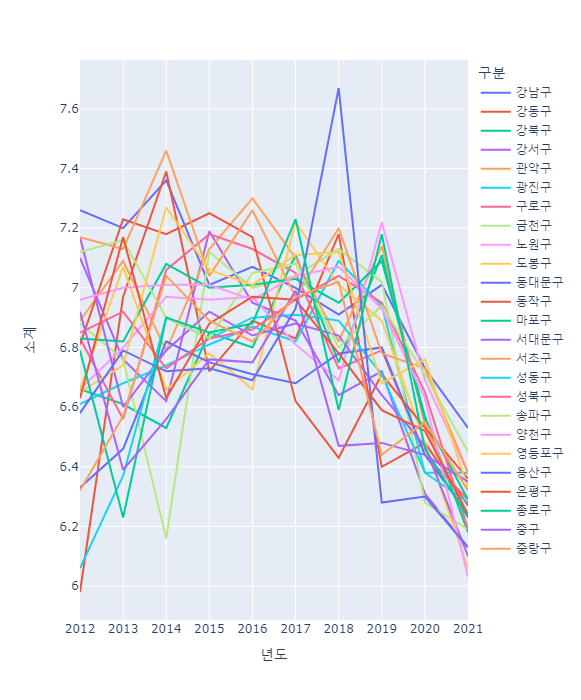

In [111]:
fig = px.line(gu_year, x="년도", y="소계", color='구분',width=1500, height=700)

fig.show()

# barchart 비교

# Choropleth

In [28]:
import requests
import json
import folium

In [29]:
r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
c = r.content
seoul_geo = json.loads(c)

In [51]:
gu_12 = gu_year.groupby('년도').get_group('2012')[['구분','소계']]
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

m.choropleth(geo_data = seoul_geo,
             data=gu_12,
             columns=['구분','소계'],
             key_on='properties.name',
             fill_color='Blues',
             fill_opacity=0.6,
             legend_name="2012년 행복지수",
             
            )
m

In [38]:
gu_13 = gu_year.groupby('년도').get_group('2013')[['구분','소계']]
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

m.choropleth(geo_data = seoul_geo,
             data=gu_13,
             columns=['구분','소계'],
             key_on='properties.name',
             # fill_color='Set3'
             fill_opacity=0.6,
             legend_name="2013년 행복지수"
            )
m

In [39]:
gu_14 = gu_year.groupby('년도').get_group('2014')[['구분','소계']]
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

m.choropleth(geo_data = seoul_geo,
             data=gu_14,
             columns=['구분','소계'],
             key_on='properties.name',
             # fill_color='Set3'
             fill_opacity=0.6,
             legend_name="2014년 행복지수"
            )
m

In [40]:
gu_15 = gu_year.groupby('년도').get_group('2015')[['구분','소계']]
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

m.choropleth(geo_data = seoul_geo,
             data=gu_15,
             columns=['구분','소계'],
             key_on='properties.name',
             # fill_color='Set3'
             fill_opacity=0.6,
             legend_name="2015년 행복지수"
            )
m

In [41]:
gu_16 = gu_year.groupby('년도').get_group('2016')[['구분','소계']]
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

m.choropleth(geo_data = seoul_geo,
             data=gu_16,
             columns=['구분','소계'],
             key_on='properties.name',
             # fill_color='Set3'
             fill_opacity=0.6,
             legend_name="2016년 행복지수"
            )
m

In [42]:
gu_17 = gu_year.groupby('년도').get_group('2017')[['구분','소계']]
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

m.choropleth(geo_data = seoul_geo,
             data=gu_17,
             columns=['구분','소계'],
             key_on='properties.name',
             # fill_color='Set3'
             fill_opacity=0.6,
             legend_name="2017년 행복지수"
            )
m

In [43]:
gu_18 = gu_year.groupby('년도').get_group('2018')[['구분','소계']]
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

m.choropleth(geo_data = seoul_geo,
             data=gu_18,
             columns=['구분','소계'],
             key_on='properties.name',
             # fill_color='Set3'
             fill_opacity=0.6,
             legend_name="2018년 행복지수"
            )
m

In [44]:
gu_19 = gu_year.groupby('년도').get_group('2019')[['구분','소계']]
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

m.choropleth(geo_data = seoul_geo,
             data=gu_19,
             columns=['구분','소계'],
             key_on='properties.name',
             # fill_color='Set3'
             fill_opacity=0.6,
             legend_name="2019년 행복지수"
            )
m

In [45]:
gu_20 = gu_year.groupby('년도').get_group('2020')[['구분','소계']]
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

m.choropleth(geo_data = seoul_geo,
             data=gu_20,
             columns=['구분','소계'],
             key_on='properties.name',
             # fill_color='Set3'
             fill_opacity=0.6,
             legend_name="2020년 행복지수"
            )
m

In [46]:
gu_21 = gu_year.groupby('년도').get_group('2021')[['구분','소계']]
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

m.choropleth(geo_data = seoul_geo,
             data=gu_21,
             columns=['구분','소계'],
             key_on='properties.name',
             # fill_color='Set3'
             fill_opacity=0.6,
             legend_name="2021년 행복지수"
            )
m